<a href="https://colab.research.google.com/github/Julianpucheta/OptimalControl/blob/main/Clase_04_HCSPD_Casos_Simbolico_Python_Pendulo_Invertido_y_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cálculo simbólico en Python**

---

En Python se puede resolver las ecuaciones diferenciales y las ecuaciones algebraicas necesarias para linealizar un proceso no lineal y diseñarle un controlador.

Para resolver un sistema de ecuaciones lineales donde $c_2(t)=\dot{c_1}(t)$ y $c_1(t)=\dot{c_2}(t)$, se puede resolver mediante la función dsolve().

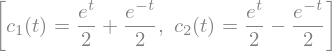

In [ ]:
from sympy import *
import numpy as np
init_printing(use_unicode=True)
x, y, z, t, w,  V=symbols('x y z t omega V')
c1=Function('c1')
c2=Function('c2')
# hq=symbols('hbar',positive=True)
g1=Eq(c2(t),Derivative(c1(t),t))
# g1=c2==dif(c1,t)
g2=Eq(c1(t),Derivative(c2(t),t))
eq=(g1,g2)
res=dsolve(eq,hint='all',ics={c1(0):1,c2(0):0})
# pretty_print(res)
res

# **Linealización en el equilibrio inestable**

Para el caso de la linealización de sistemas dinámicos, como el péndulo en su equilibrio inestable, se puede linealizar aplicando Taylor a las ecuaciones


<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta} \\
Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}
\end{cases}
\end{equation*}$

en el punto de operación $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $[0,0,0,0]^T$.
Primero se trata de despejar las funciones $\ddot{\delta}$ y $\ddot{\phi}$.


In [ ]:
from sympy import *
import numpy as np
init_printing(use_unicode=True)
#syms fi fi_p fi_pp p p_p p_pp M m u long Fricc g;
fi, fi_p, fi_pp, p, p_p, p_pp, M, m, u, long, Fricc, g=symbols('fi fi_p fi_pp p p_p p_pp M m u long Fricc g')
# p_pp=(1/(M+m))*(u-m*long*fi_pp+m*long*fi_p**2*fi-Fricc*p_p) #; %Pequeños angulos
Eq1=Eq(p_pp-(1/(M+m))*(u-m*long*fi_pp+m*long*fi_p**2*fi-Fricc*p_p),0)
#% fi_pp=(1/long)*(g*(fi)-p_pp); %Pequeños angulos para fi~0, sin(fi)~fi, cos(fi)~1
Eq2=Eq(fi_pp-(1/long)*(g*fi-p_pp),0)
sol = solve((Eq1, Eq2),(p_pp, fi_pp))
# print(sol)
p_pp=sol[p_pp]
fi_pp=sol[fi_pp]
print('p_pp final es')
pretty_print(p_pp)
print('fi_pp final es')
pretty_print(fi_pp)

p_pp final es
                  2                    
-Fricc⋅pₚ + fi⋅fiₚ ⋅long⋅m - fi⋅g⋅m + u
───────────────────────────────────────
                   M                   
fi_pp final es
                          2                    
Fricc⋅pₚ + M⋅fi⋅g - fi⋅fiₚ ⋅long⋅m + fi⋅g⋅m - u
───────────────────────────────────────────────
                     M⋅long                    


Así, para el equilibrio inestable, ambas funciones son:

$\begin{equation*}
\begin{cases}
\ddot{\delta} = \dfrac{-Fricc \cdot \dot{\delta}+\phi \cdot {\dot{\delta}}^2\cdot long\cdot m -\phi\cdot g\cdot m+u}{M} \\
\ddot{\phi} = \dfrac{Fricc \cdot \dot{\delta}+M \cdot \phi \cdot g- \phi \cdot{\dot{\phi}}^2\cdot long\cdot m + \phi\cdot g\cdot m-u}{M\cdot long}
\end{cases}
\end{equation*}$
<!--
p_pp=
                      2                    
  -Fricc⋅p_p + fi⋅fi_p ⋅long⋅m - fi⋅g⋅m + u
  ─────────────────────────────────────────
                      M                    
fi_pp=
                              2                    
  Fricc⋅p_p + M⋅fi⋅g - fi⋅fi_p ⋅long⋅m + fi⋅g⋅m - u
  ─────────────────────────────────────────────────
                        M⋅long                             -->

Ahora se procede a realizar las derivadas de las funciones $\ddot{\delta}$ y $\ddot{\phi}$ respecto de las cuatro variables, que son $\delta$, $\dot{\delta}$, $\phi$, y $\ddot{\phi}$.
Se emplea la función diff() y al resultado se lo valúa en el punto de operación mediante la indicación de cada uno con la operación .subs().

In [ ]:
Mat_A=[[0,1,0,0],
  [diff(p_pp, p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(p_pp, p_p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(p_pp, fi).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(p_pp, fi_p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0)],
  [0,0,0,1],
  [diff(fi_pp, p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(fi_pp, p_p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(fi_pp, fi).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(fi_pp, fi_p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0)]]
Mat_B=[[0],
 [diff(p_pp, u).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0)],
 [0],
[diff(fi_pp, u).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0)]]
# print(Mat_A)
# print(Mat_B)
pretty_print(Mat_A)
pretty_print(Mat_B)

⎡              ⎡   -Fricc   -g⋅m    ⎤                ⎡   Fricc   M⋅g + g⋅m   ⎤
⎢[0, 1, 0, 0], ⎢0, ───────, ─────, 0⎥, [0, 0, 0, 1], ⎢0, ──────, ─────────, 0⎥
⎣              ⎣      M       M     ⎦                ⎣   M⋅long    M⋅long    ⎦

⎤
⎥
⎦
⎡     ⎡1⎤       ⎡ -1   ⎤⎤
⎢[0], ⎢─⎥, [0], ⎢──────⎥⎥
⎣     ⎣M⎦       ⎣M⋅long⎦⎦


Se requiere verificar el correcto desempeño de la linealización hecha mediante la simulación numérica mediante Euler.

**Simulación** del Péndulo con Python.
A continuación se muestra el resultado.


# **Verificación numérica y visualización gráfica**

# **Simulación numérica para el equilibrio inestable**



<ipython-input-38-4282c4fe452e>:37: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-38-4282c4fe452e>:41: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-38-4282c4fe452e>:51: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-38-4282c4fe452e>:52: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this o

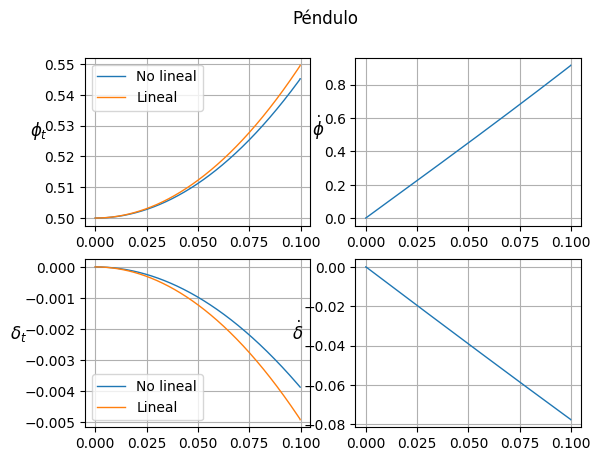

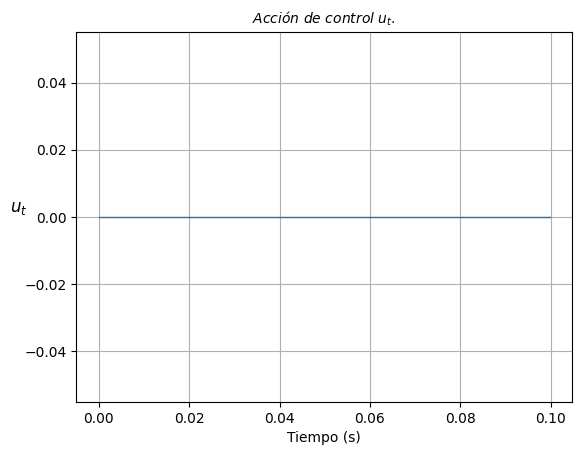

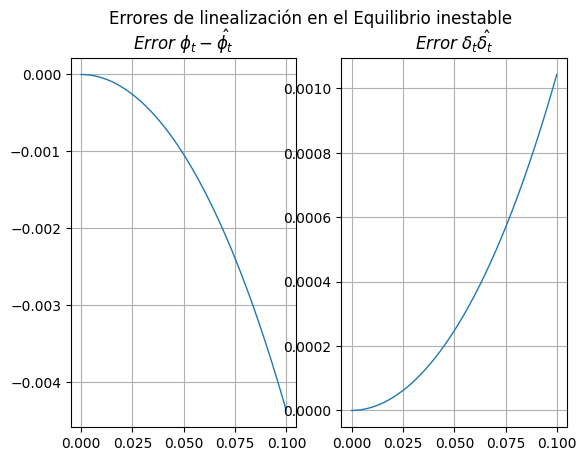

In [ ]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *
from numpy.linalg import eig
m=.1;Fricc=0.1; long=.6;g=9.8;M=.5;
##%Versión linealizada en el equilibrio inestable. Sontag Pp 104.
##%            estado=[p(i); p_p(i); fi(i); omega(i)]
##Mat_A=[0 1 0 0;0 -Fricc/M -m*g/M 0; 0 0 0 1; 0 Fricc/(long*M) g*(m+M)/(long*M) 0];
##Mat_B=[0; 1/M; 0; -1/(long*M)];1
##Mat_C=[1 0 0 0]; %La salida es posición
h=1e-4;t_simul=.10; #Tiene que ser muy pequeño para que se vea que coinciden
Mat_A=np.array([[0. ,1. ,0. ,0.],[0.,-Fricc/M, -m*g/M,0.],[0., 0. ,0. ,1.],[0.,Fricc/(long*M) ,g*(m+M)/(long*M), 0.]])
Mat_B=np.array([[0.],[1/M],[0.],[-1./(long*M)]])
Mat_C=np.array([[1., 0., 0., 0.]])
fi=np.linspace(0,0,int(t_simul/h))
omega=np.linspace(0,0,int(t_simul/h))
p_p=np.linspace(0,0,int(t_simul/h))
u=np.linspace(0,0,int(t_simul/h))
p=np.linspace(0,0,int(t_simul/h))
y=np.linspace(0,0,int(t_simul/h))
y_o=np.linspace(0,0,int(t_simul/h))
p_O=np.linspace(0,0,int(t_simul/h))
fi_O=np.linspace(0,0,int(t_simul/h))
t=np.linspace(0,0,int(t_simul/h))
##fi(1)=.1; color='r';
##fi(1)=.2; color='g';
##fi(1)=.7; color='b';
fi[0]=.5
fi_O[0]=fi[0]
fi_pp=0.
u[0]=0.
estado=[[p[0]], [p_p[0]], [fi[0]], [omega[0]]]
x_hat=estado #Igual condiciones inicial es del sistema lineal
for ii in range(int(t_simul/h)-1):
    y[ii]=np.matmul(Mat_C,estado) # Mat_C @ estado
    u[ii+1]=0.
    p_pp=(1/(M+m))*(u[ii]-m*long*fi_pp*cos(fi[ii])+(m*long*omega[ii]**2)*sin(fi[ii])-Fricc*p_p[ii])
    fi_pp=(1/long)*(g*sin(fi[ii])-p_pp*cos(fi[ii]))
    y_o[ii]=np.matmul(Mat_C,x_hat)
    x_hatp = np.matmul(Mat_A,x_hat) + Mat_B*u[ii]
    # x_hatp = Mat_A @ x_hat + Mat_B @ u[ii]
    x_hat = x_hat + h*x_hatp;
    p_p[ii+1]  =p_p[ii]+h*p_pp;
    p[ii+1]    =p[ii]+h*p_p[ii];
    omega[ii+1]=omega[ii]+h*fi_pp;
    fi[ii+1]   =fi[ii]+h*omega[ii];
    t[ii] = ii*h
    estado=[[p[ii+1]], [p_p[ii+1]], [fi[ii+1]], [omega[ii+1]]]
    p_O[ii+1]=x_hat[0] #El vector inicia en 0, en Octave en 1
    fi_O[ii+1]=x_hat[2]
t[ii+1] = ii*h
u[ii+1]=0.


fig, axs = plt.subplots(2,2)
fig.suptitle('Péndulo')
axs[0,0].plot(t, fi, linewidth =1.0)
axs[0,0].plot(t, fi_O, linewidth =1.0)
axs[0,0].legend(["No lineal","Lineal"])
axs[0,0].grid( True )
axs[0,0].set_ylabel('$\phi_t$',rotation=0, fontsize=12)
axs[0,1].plot(t, omega, linewidth =1.0)
axs[0,1].set_ylabel('$\dot{\phi}$',rotation=0, fontsize=12)
axs[0,1].grid( True )

axs[1,0].plot(t[:-1], p[:-1], linewidth =1.0)
axs[1,0].plot(t, p_O, linewidth =1.0)
axs[1,0].legend(["No lineal","Lineal"])
axs[1,0].grid( True )
axs[1,0].set_ylabel('$\delta_t$',rotation=0, fontsize=12)
axs[1,1].plot(t, p_p, linewidth =1.0)
axs[1,1].set_ylabel('$\dot{\delta}$',rotation=0, fontsize=12)
axs[1,1].grid( True )

#Acción de control
fig, ax1 = plt.subplots()
plt.plot(t, u, linewidth =1.0)
plt.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12)
ax1.set_xlabel('Tiempo (s)')
#ax1.set_title(r'$\ddot{o}\acute{e}\grave{e}\hat{O}'
#             r'\breve{i}\bar{A}\tilde{n}\vec{q}$', fontsize=20)
ax1.set_title('$Acción\ de\ control\ u_t.$', fontsize=10)

fig2, axs2 = plt.subplots(1,2)
fig2.suptitle('Errores de linealización en el Equilibrio inestable')
axs2[0].plot(t, fi-fi_O, linewidth =1.0)
axs2[0].grid( True )
axs2[0].set_title('$Error\ \phi_t-\hat{\phi_t}$',rotation=0, fontsize=12)
axs2[1].plot(t, p-p_O, linewidth =1.0)
axs2[1].set_title('$Error\ \delta_t\hat{\delta_t}$',rotation=0, fontsize=12)
axs2[1].grid( True )

In [ ]:
import pandas as pd
import plotly.graph_objects as go

In [ ]:
df = pd.DataFrame({'t': t.T, 'p': p.T, 'po': p_O.T})
df.tail(4) # t_s=mat.get('t_s')
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['t'], y=df['p'], mode='lines', name='Posición'))
fig.add_trace(go.Scatter(x=df['t'], y=df['po'], mode='lines', name='Posición O'))
# Customize the layout
fig.update_layout(title='Simulación del Péndulo',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True)
# Display the interactive Plotly chart
fig.show()

# **Linealización en el equilibrio estable**

Para el caso de la linealización de sistemas dinámicos, como el péndulo en su equilibrio **estable**, se puede linealizar aplicando Taylor a las ecuaciones cuando $\phi \approx π$



<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot (\pi-\phi) -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} - m\cdot long \cdot \dot{\phi}^2 \cdot (\pi-\phi) -Fricc\cdot \dot{\delta} \\
Long \cdot \ddot{\phi} = -g \cdot (\pi-\phi) - \ddot{\delta}
\end{cases}
\end{equation*}$

en el punto de operación $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $[0,0,\pi,0]^T$.
Primero se trata de despejar las funciones $\ddot{\delta}$ y $\ddot{\phi}$.


In [ ]:
from sympy import *
import numpy as np
init_printing(use_unicode=True)
#syms fi fi_p fi_pp p p_p p_pp M m u long Fricc g;
fi, fi_p, fi_pp, p, p_p, p_pp, M, m, u, long, Fricc, g=symbols('fi fi_p fi_pp p p_p p_pp M m u long Fricc g')
Eq1=Eq(p_pp-(1/(M+m))*(u+m*long*fi_pp+m*long*fi_p**2*(pi-fi)-Fricc*p_p),0)
#% fi_pp=(1/long)*(g*(fi)-p_pp); %Pequeños angulos para fi~0, sin(fi)~fi, cos(fi)~1
Eq2=Eq(fi_pp-(1/long)*(g*(pi-fi)+p_pp),0)
sol = solve((Eq1, Eq2),(p_pp, fi_pp))
# print(sol)
p_pp=sol[p_pp]
fi_pp=sol[fi_pp]
print('p_pp final es')
pretty_print(p_pp)
print('fi_pp final es')
pretty_print(fi_pp)

p_pp final es
                  2                        2                   
-Fricc⋅pₚ - fi⋅fiₚ ⋅long⋅m - fi⋅g⋅m + π⋅fiₚ ⋅long⋅m + π⋅g⋅m + u
───────────────────────────────────────────────────────────────
                               M                               
fi_pp final es
                                   2                        2                 
-Fricc⋅pₚ - M⋅fi⋅g + π⋅M⋅g - fi⋅fiₚ ⋅long⋅m - fi⋅g⋅m + π⋅fiₚ ⋅long⋅m + π⋅g⋅m +
──────────────────────────────────────────────────────────────────────────────
                                     M⋅long                                   

  
 u
──
  


Así, para el equilibrio **estable**, ambas funciones son:

$\begin{equation*}
\begin{cases}
\ddot{\delta} = \dfrac{-Fricc \cdot \dot{\delta}+(\pi-\phi) \cdot {\dot{\delta}}^2\cdot long\cdot m +(\pi-\phi)\cdot g\cdot m+u}{M} \\
\ddot{\phi} = \dfrac{-Fricc \cdot \dot{\delta}+M \cdot (\pi-\phi) \cdot g+ (\pi-\phi) \cdot{\dot{\phi}}^2\cdot long\cdot m + (\pi-\phi)\cdot g\cdot m+u}{M\cdot long}
\end{cases}
\end{equation*}$


Ahora se procede a realizar las derivadas de las funciones $\ddot{\delta}$ y $\ddot{\phi}$ respecto de las cuatro variables, que son $\delta$, $\dot{\delta}$, $\phi$, y $\ddot{\phi}$.
Se emplea la función diff() y al resultado se lo valúa en el punto de operación mediante la indicación de cada uno con la operación .subs().

In [ ]:
Mat_A=[[0,1,0,0],
  [diff(p_pp, p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(p_pp, p_p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(p_pp, fi).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(p_pp, fi_p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0)],
  [0,0,0,1],
  [diff(fi_pp, p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(fi_pp, p_p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(fi_pp, fi).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(fi_pp, fi_p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0)]]
Mat_B=[[0],
 [diff(p_pp, u).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0)],
 [0],
[diff(fi_pp, u).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0)]]
print(Mat_A)
print(Mat_B)
pretty_print(Mat_A)
pretty_print(Mat_B)

[[0, 1, 0, 0], [0, -Fricc/M, -g*m/M, 0], [0, 0, 0, 1], [0, -Fricc/(M*long), (-M*g - g*m)/(M*long), 0]]
[[0], [1/M], [0], [1/(M*long)]]
⎡              ⎡   -Fricc   -g⋅m    ⎤                ⎡   -Fricc   -M⋅g - g⋅m  
⎢[0, 1, 0, 0], ⎢0, ───────, ─────, 0⎥, [0, 0, 0, 1], ⎢0, ───────, ──────────, 
⎣              ⎣      M       M     ⎦                ⎣    M⋅long    M⋅long    

 ⎤⎤
0⎥⎥
 ⎦⎦
⎡     ⎡1⎤       ⎡  1   ⎤⎤
⎢[0], ⎢─⎥, [0], ⎢──────⎥⎥
⎣     ⎣M⎦       ⎣M⋅long⎦⎦


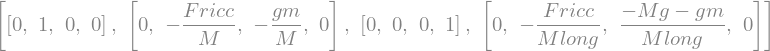

In [ ]:
Mat_A

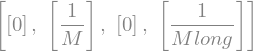

In [ ]:
Mat_B

# **Simulación numérica para el equilibrio estable**

In [ ]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *
from numpy.linalg import eig
m=.1;Fricc=0.1; long=.6;g=9.8;M=.5;
##%Versión linealizada en el equilibrio Estable. Sontag Pp 104.
##%            estado=[p(i); p_p(i); fi(i); omega(i)]
##Mat_A=[0 1 0 0;0 -Fricc/M -m*g/M 0; 0 0 0 1; 0 Fricc/(long*M) g*(m+M)/(long*M) 0];
##Mat_B=[0; 1/M; 0; -1/(long*M)];1
##Mat_C=[1 0 0 0]; %La salida es posición
h=1e-3;t_simul=10.;
Mat_A=np.array([[0. ,1. ,0. ,0.],[0.,-Fricc/M, -m*g/M,0.],[0., 0. ,0. ,1.],[0.,-Fricc/(long*M) ,-g*(m+M)/(long*M), 0.]])
Mat_B=np.array([[0.],[1/M],[0.],[1./(long*M)]])
# Mat_C=np.array([[1., 0., 0., 0.],[0, 0., 1., 0.]]) #Para cuando y tiene dos componentes
Mat_C=np.array([[1., 0., 0., 0.]])
fi=np.linspace(0,0,int(t_simul/h))
omega=np.linspace(0,0,int(t_simul/h))
p_p=np.linspace(0,0,int(t_simul/h))
u=np.linspace(0,0,int(t_simul/h))
p=np.linspace(0,0,int(t_simul/h))
y=np.linspace(0,0,int(t_simul/h))
y_o=np.linspace(0,0,int(t_simul/h))
p_O=np.linspace(0,0,int(t_simul/h))
p_pO=np.linspace(0,0,int(t_simul/h))
fi_O=np.linspace(0,0,int(t_simul/h))
fi_pO=np.linspace(0,0,int(t_simul/h))
t=np.linspace(0,0,int(t_simul/h))
##fi(1)=.1; color='r';
##fi(1)=.2; color='g';
##fi(1)=.7; color='b';
fi[0]=3.5
fi_pp=0.
u[0]=0.
estado=[[p[0]], [p_p[0]], [fi[0]], [omega[0]]]
x_hat=np.array([[0.] ,[0.] ,[fi[0]],[0.]])
xOP=np.array([[0.] ,[0.] ,[pi] ,[0.]])
p_O[0]=x_hat[0][0] #El vector inicia en 0, en Octave en 1
p_pO[0]=x_hat[1][0]
fi_O[0]=x_hat[2][0]
fi_pO[0]=x_hat[3][0]
for ii in range(int(t_simul/h)-1):
    y[ii]=np.matmul(Mat_C,estado)
    u[ii+1]=0. #Para accionar la fuerza
    p_pp=(1/(M+m))*(u[ii]-m*long*fi_pp*cos(fi[ii])+(m*long*omega[ii]**2)*sin(fi[ii])-Fricc*p_p[ii])
    fi_pp=(1/long)*(g*sin(fi[ii])-p_pp*cos(fi[ii]))
    y_o[ii]=np.matmul(Mat_C,x_hat)
    x_hatp = np.matmul(Mat_A,x_hat-xOP) + Mat_B*u[ii]
    x_hat = x_hat + h*x_hatp;
    p_p[ii+1]  =p_p[ii]+h*p_pp;
    p[ii+1]    =p[ii]+h*p_p[ii];
    omega[ii+1]=omega[ii]+h*fi_pp;
    fi[ii+1]   =fi[ii]+h*omega[ii];
    t[ii] = ii*h
    estado=[[p[ii+1]], [p_p[ii+1]], [fi[ii+1]], [omega[ii+1]]]
    p_O[ii+1]=x_hat[0] #El vector inicia en 0, en Octave en 1
    p_pO[ii+1]=x_hat[1]
    fi_O[ii+1]=x_hat[2]
    fi_pO[ii+1]=x_hat[3]
t[ii+1] = ii*h
u[ii+1]=0.

<ipython-input-28-20d43df8c834>:44: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-28-20d43df8c834>:48: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-28-20d43df8c834>:57: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-28-20d43df8c834>:58: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this o

In [ ]:
import pandas as pd
import plotly.graph_objects as go

In [ ]:
df = pd.DataFrame({'t': t.T, 'fi': fi, 'fio': fi_O.T})
df.tail(4) # t_s=mat.get('t_s')
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['t'], y=df['fi'], mode='lines', name='Ángulo'))
fig.add_trace(go.Scatter(x=df['t'], y=df['fio'], mode='lines', name='Ángulo O'))
# Customize the layout
fig.update_layout(title='Simulación del Péndulo',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True)
# Display the interactive Plotly chart
fig.show()

## Suplementos para graficar según normas

### Instala el intérprete Latex para imprimir

In [ ]:
# sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super
!apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!pip install SciencePlots
# import matplotlib.pyplot as plt
# plt.style.use('science')
# plt.style.use('Solarize_Light2')

In [ ]:
# import matplotlib.pyplot as plt
# import scienceplots as science
import scienceplots

In [ ]:
# plt.style.use('science')
# !pip install git+https://github.com/garrettj403/SciencePlots
# import matplotlib.pyplot as plt

In [ ]:
# plt.style.reload_library()

In [ ]:
# import scienceplots
# plt.style.use(['science', 'notebook', 'ieee'])

In [ ]:
# plt.style.reload_library() vuelve a estilos por defecto

In [ ]:
# plt.style.use(['science','ieee'])
style.available #tienen que aparecer science y ieee

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'latex-sans',
 'light',
 'muted',
 'nature',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'russian-font',
 'sans',
 'scatter',
 'science',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'turkish-font',
 'vibrant']

In [ ]:
# !pip install git+https://github.com/garrettj403/SciencePlots

In [ ]:
# import scienceplots
# plt.style.use('science')
# plt.style.available

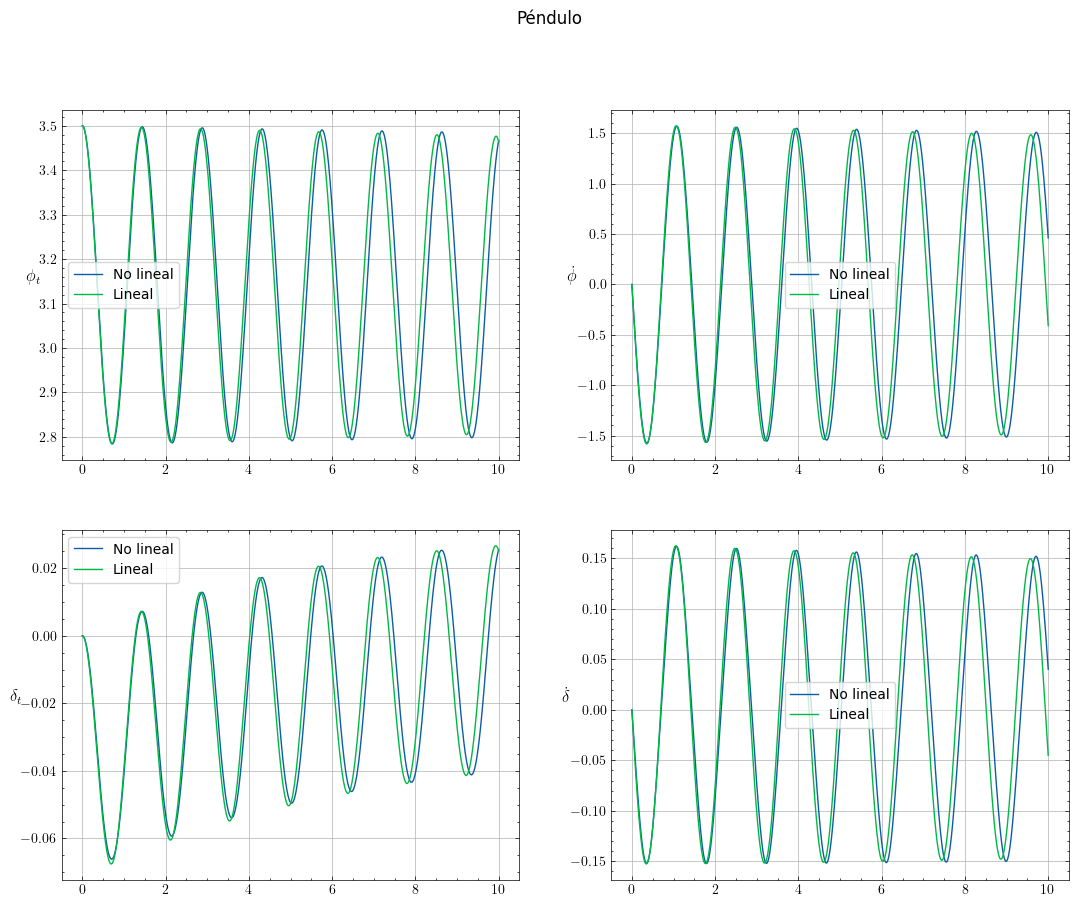

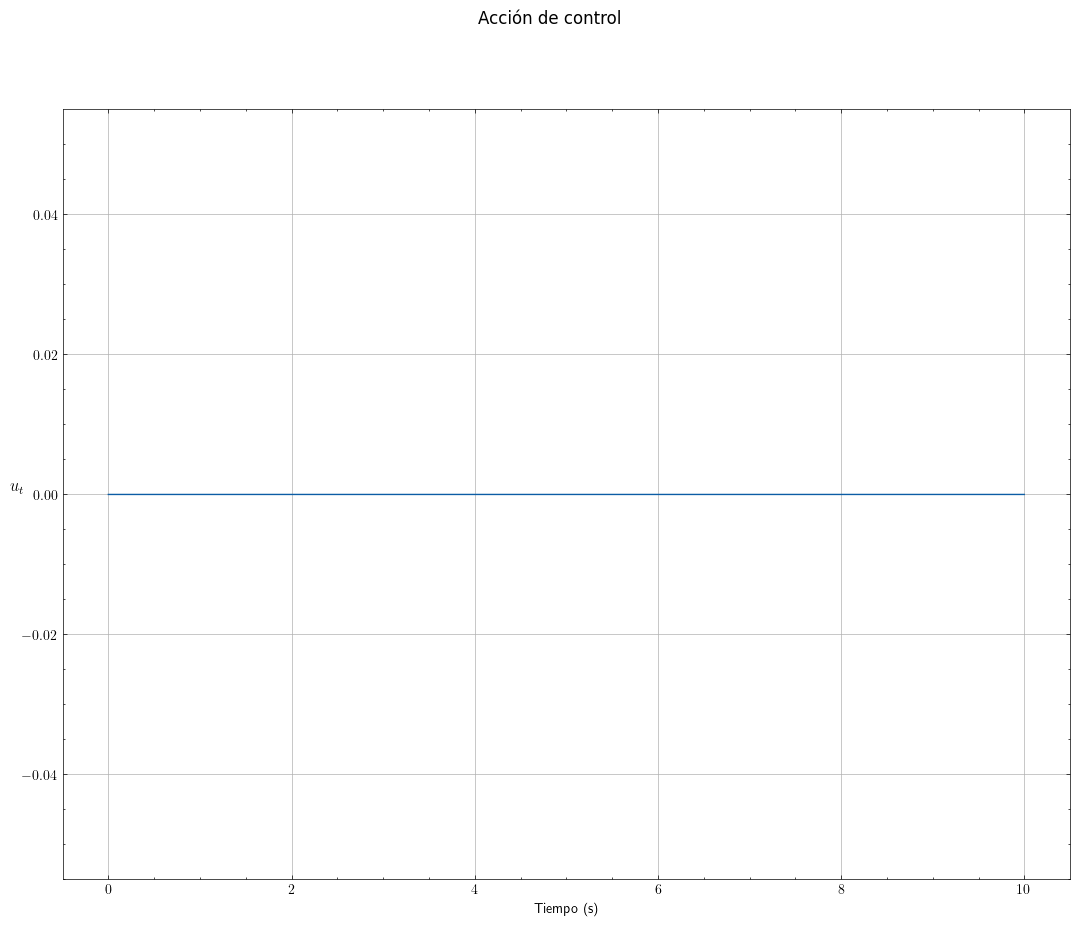

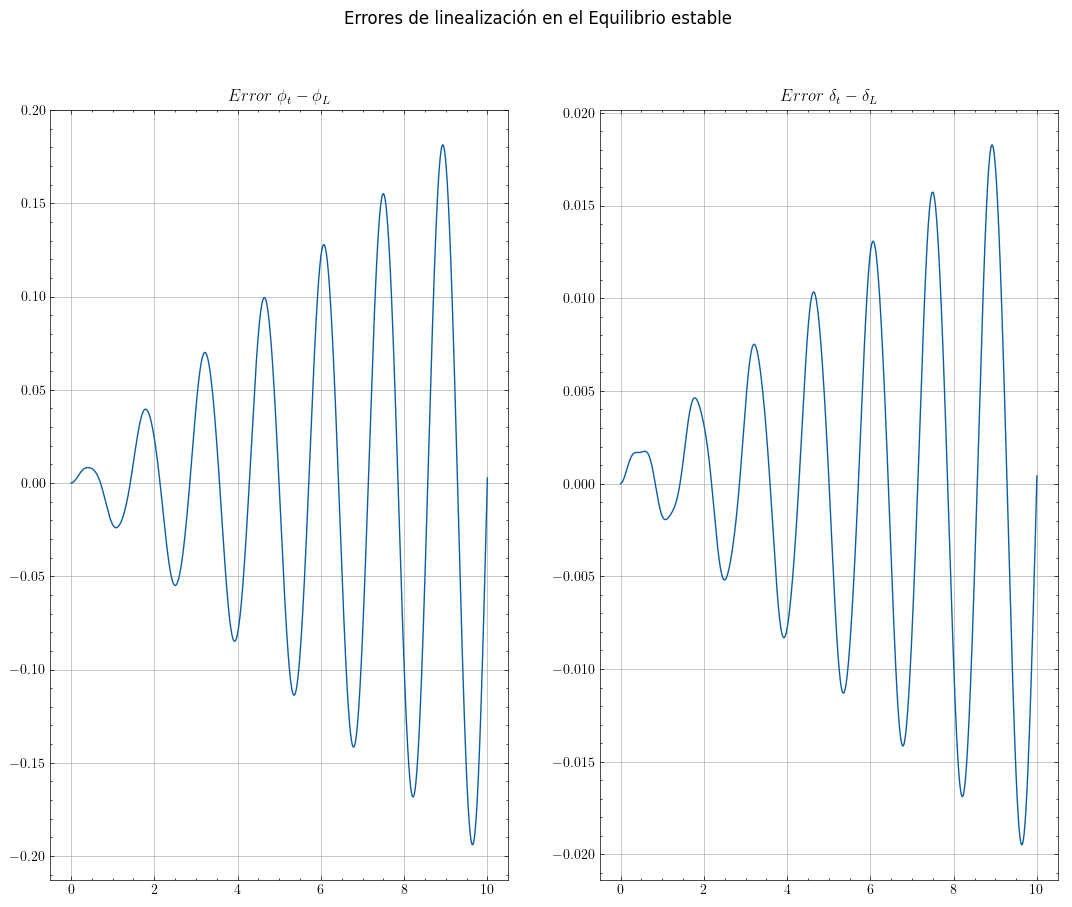

In [ ]:
with plt.style.context('science'):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    # plt.figure()
    # plt.plot(x, y)
    # plt.show()
  fig, axs = plt.subplots(2,2,figsize=(13,10), dpi= 100) #fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
  fig1, ax1 = plt.subplots(1,1,figsize=(13,10), dpi= 100)
  fig2, axs2 = plt.subplots(1,2,figsize=(13,10), dpi= 100)

fig.suptitle('Péndulo')
axs[0,0].plot(t, fi, linewidth =1.0)
axs[0,0].plot(t, fi_O, linewidth =1.0)
axs[0,0].legend(["No lineal","Lineal"])
axs[0,0].grid( True )
axs[0,0].set_ylabel('$\phi_t$',rotation=0, fontsize=12)
axs[0,1].plot(t, omega, linewidth =1.0)
axs[0,1].plot(t, fi_pO, linewidth =1.0)
axs[0,1].legend(["No lineal","Lineal"])
axs[0,1].set_ylabel('$\dot{\phi}$',rotation=0, fontsize=12)
axs[0,1].grid( True )

axs[1,0].plot(t, p, linewidth =1.0)
axs[1,0].plot(t, p_O, linewidth =1.0)
axs[1,0].legend(["No lineal","Lineal"])
axs[1,0].grid( True )
axs[1,0].set_ylabel('$\delta_t$',rotation=0, fontsize=12)
axs[1,1].plot(t, p_p, linewidth =1.0)
axs[1,1].plot(t, p_pO, linewidth =1.0)
axs[1,1].legend(["No lineal","Lineal"])
axs[1,1].set_ylabel('$\dot{\delta}$',rotation=0, fontsize=12)
axs[1,1].grid( True )

#Acción de control
# fig, ax1 = plt.subplots()
fig1.suptitle('Acción de control')
ax1.plot(t, u, linewidth =1.0)
ax1.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12)
ax1.set_xlabel('Tiempo (s)')
#ax1.set_title(r'$\ddot{o}\acute{e}\grave{e}\hat{O}'
#             r'\breve{i}\bar{A}\tilde{n}\vec{q}$', fontsize=20)
# ax1.set_title(r'$Acción\ de\ control\ u_t.$', fontsize=10)

#
fig2.suptitle('Errores de linealización en el Equilibrio estable')
axs2[0].plot(t, fi-fi_O, linewidth =1.0)
axs2[0].grid( True )
axs2[0].set_title('$Error\ \phi_t-\phi_L$',rotation=0, fontsize=12)
axs2[1].plot(t, p-p_O, linewidth =1.0)
axs2[1].set_title('$Error\ \delta_t-\delta_L$',rotation=0, fontsize=12)
axs2[1].grid( True )

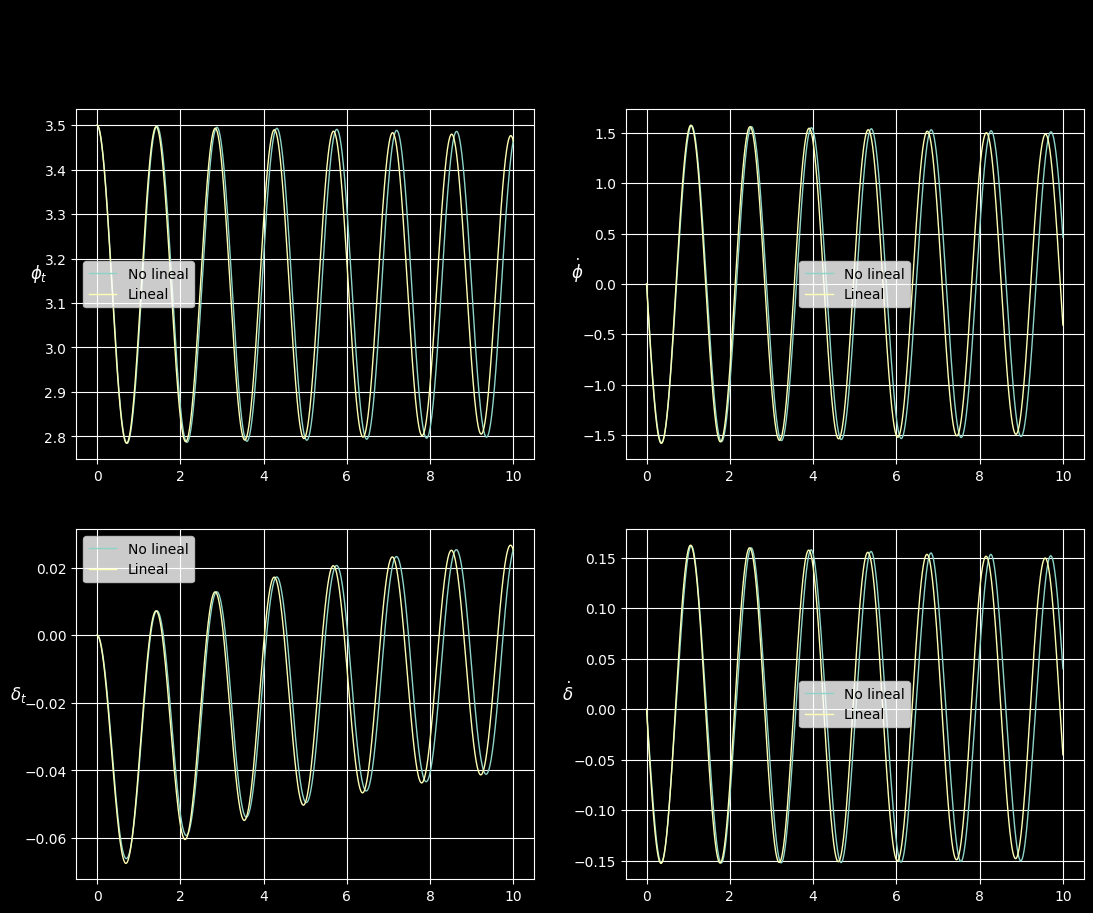

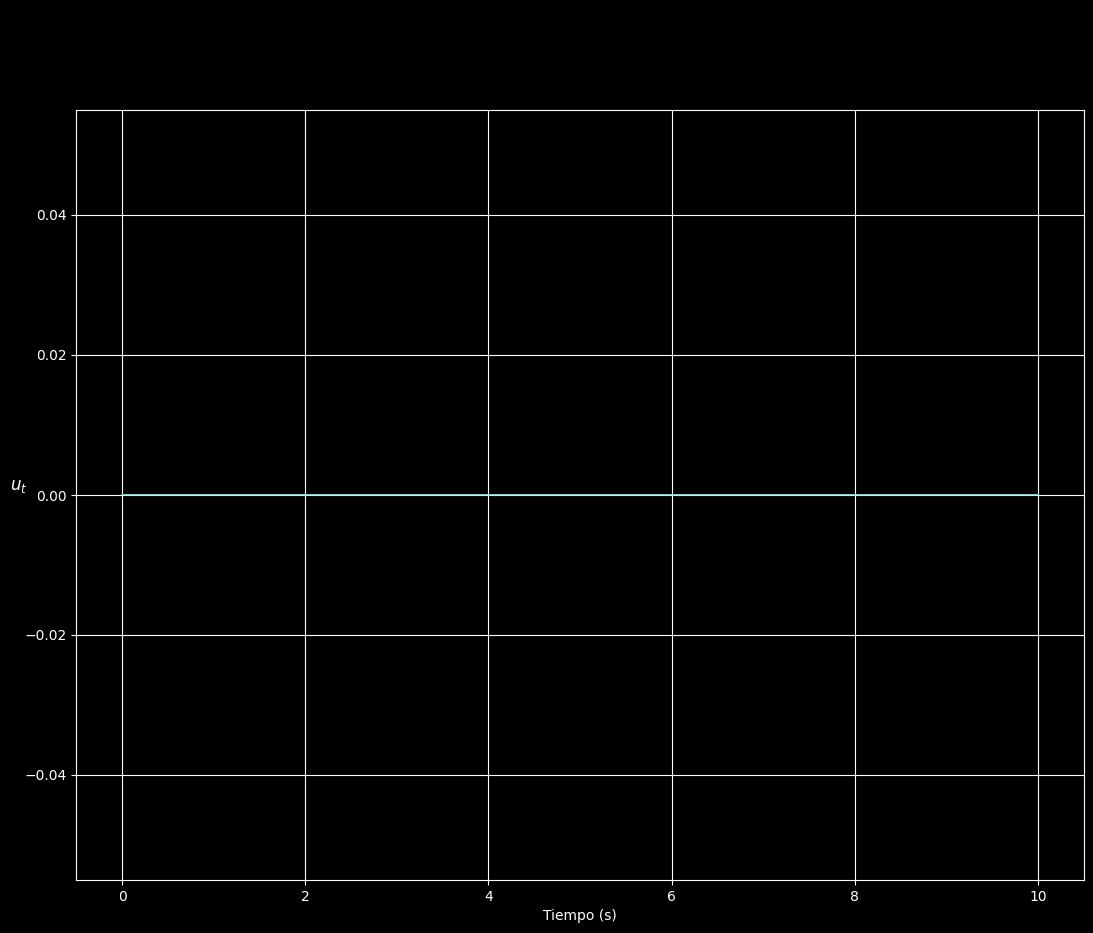

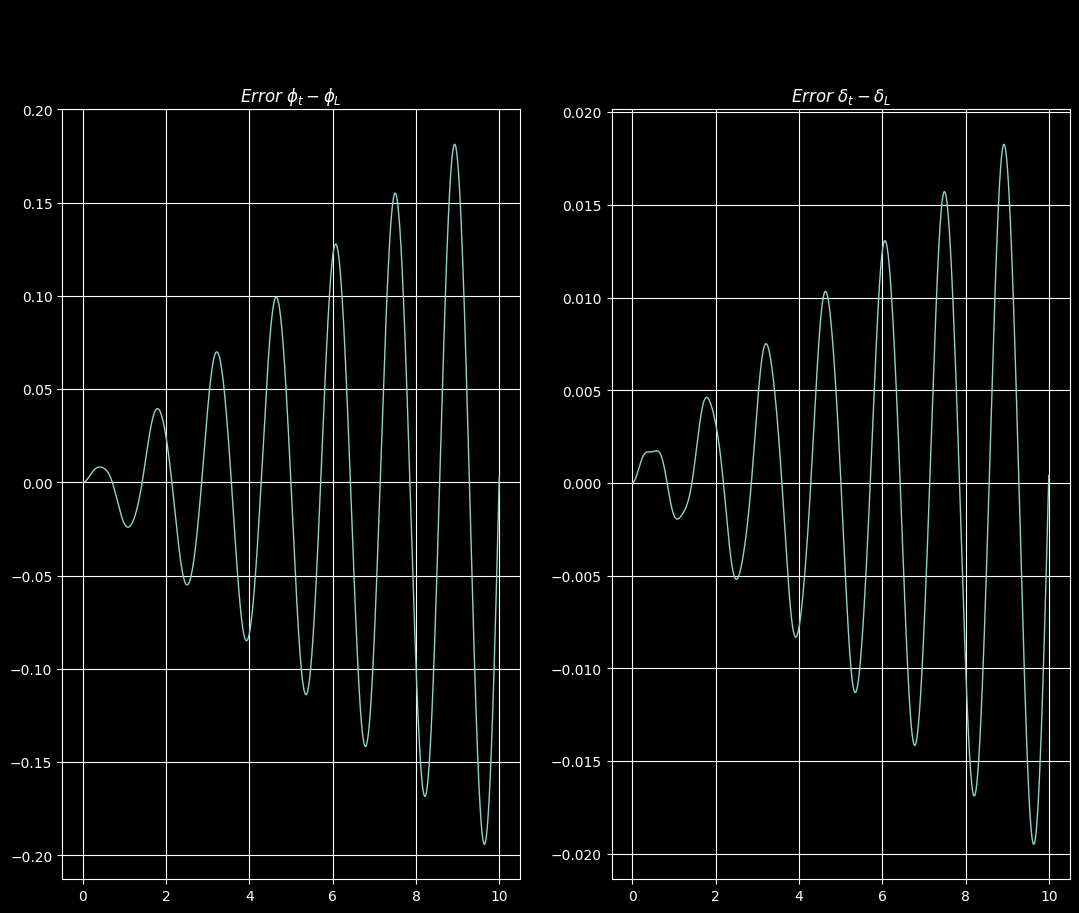

In [ ]:
# with plt.style.context('science'):
with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    # plt.figure()
    # plt.plot(x, y)
    # plt.show()
  fig, axs = plt.subplots(2,2,figsize=(13,10), dpi= 100) #fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
  fig1, ax1 = plt.subplots(1,1,figsize=(13,10), dpi= 100)
  fig2, axs2 = plt.subplots(1,2,figsize=(13,10), dpi= 100)
fig.suptitle('Péndulo')
axs[0,0].plot(t, fi, linewidth =1.0)
axs[0,0].plot(t, fi_O, linewidth =1.0)
axs[0,0].legend(["No lineal","Lineal"])
axs[0,0].grid( True )
axs[0,0].set_ylabel('$\phi_t$',rotation=0, fontsize=12)
axs[0,1].plot(t, omega, linewidth =1.0)
axs[0,1].plot(t, fi_pO, linewidth =1.0)
axs[0,1].legend(["No lineal","Lineal"])
axs[0,1].set_ylabel('$\dot{\phi}$',rotation=0, fontsize=12)
axs[0,1].grid( True )

axs[1,0].plot(t, p, linewidth =1.0)
axs[1,0].plot(t, p_O, linewidth =1.0)
axs[1,0].legend(["No lineal","Lineal"])
axs[1,0].grid( True )
axs[1,0].set_ylabel('$\delta_t$',rotation=0, fontsize=12)
axs[1,1].plot(t, p_p, linewidth =1.0)
axs[1,1].plot(t, p_pO, linewidth =1.0)
axs[1,1].legend(["No lineal","Lineal"])
axs[1,1].set_ylabel('$\dot{\delta}$',rotation=0, fontsize=12)
axs[1,1].grid( True )

#Acción de control
# fig, ax1 = plt.subplots()
fig1.suptitle('Acción de control')
ax1.plot(t, u, linewidth =1.0)
ax1.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12)
ax1.set_xlabel('Tiempo (s)')
#ax1.set_title(r'$\ddot{o}\acute{e}\grave{e}\hat{O}'
#             r'\breve{i}\bar{A}\tilde{n}\vec{q}$', fontsize=20)
# ax1.set_title(r'$Acción\ de\ control\ u_t.$', fontsize=10)

#
fig2.suptitle('Errores de linealización en el Equilibrio estable')
axs2[0].plot(t, fi-fi_O, linewidth =1.0)
axs2[0].grid( True )
axs2[0].set_title('$Error\ \phi_t-\phi_L$',rotation=0, fontsize=12)
axs2[1].plot(t, p-p_O, linewidth =1.0)
axs2[1].set_title('$Error\ \delta_t-\delta_L$',rotation=0, fontsize=12)
axs2[1].grid( True )

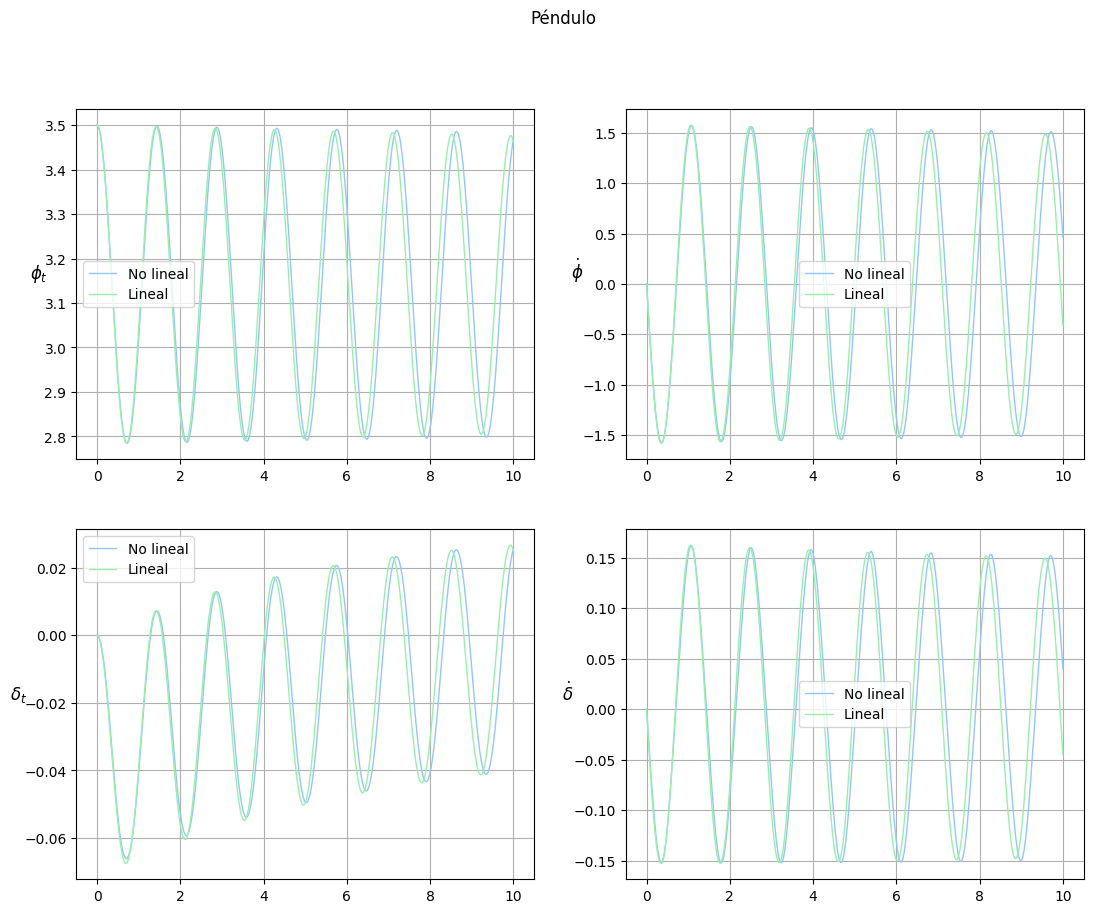

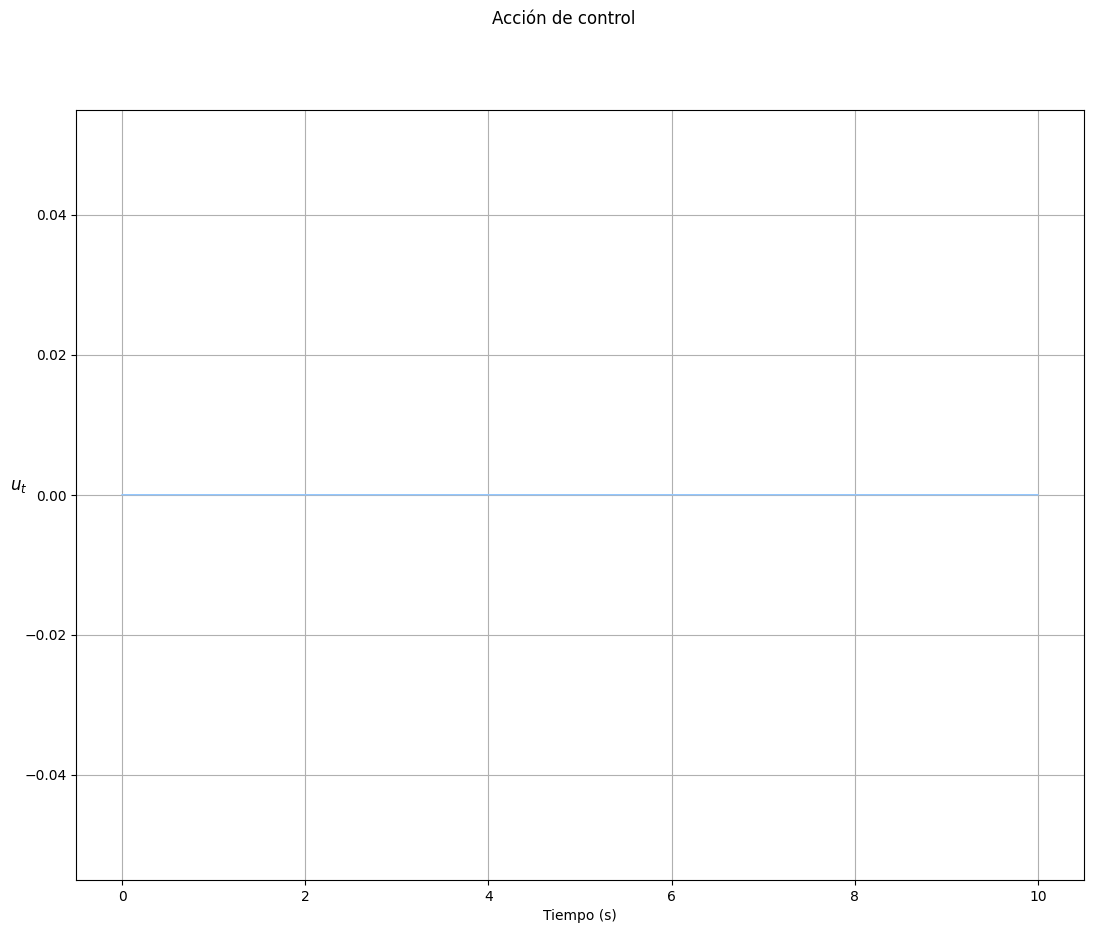

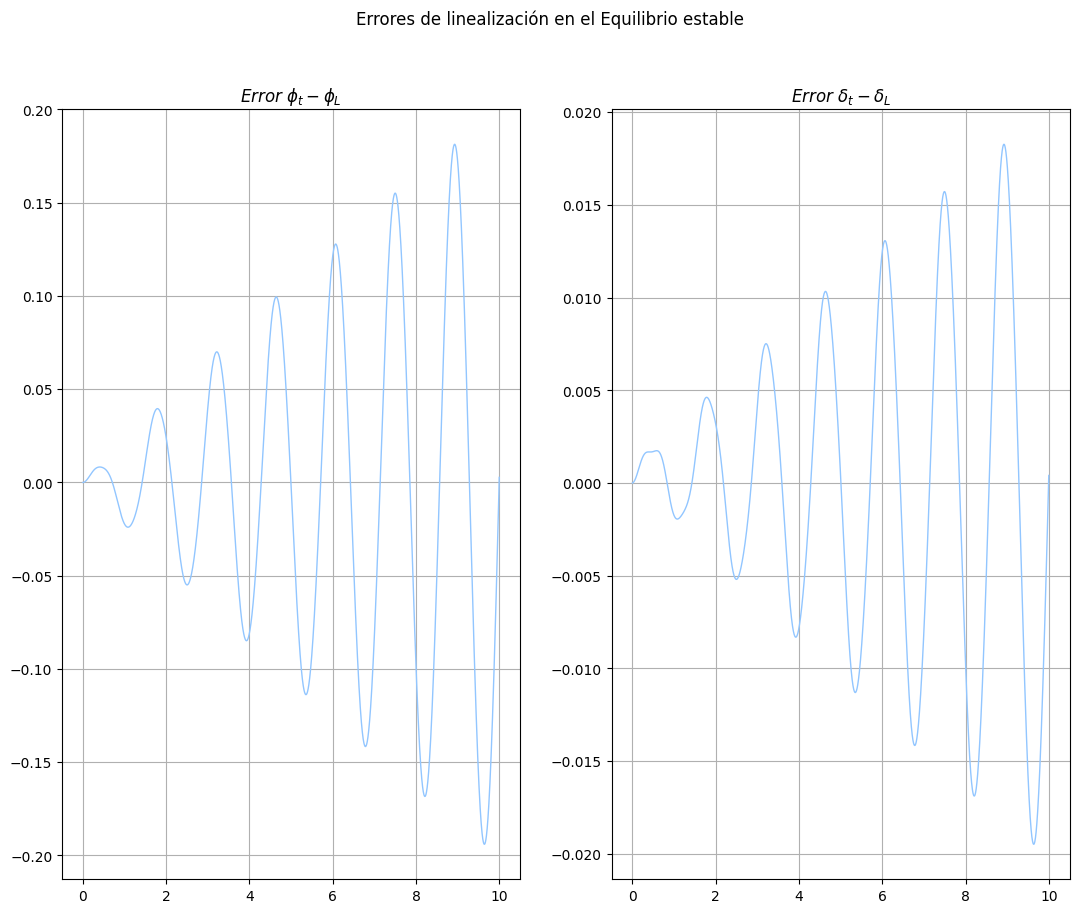

In [ ]:
# with plt.style.context('science'):
# with plt.style.context('dark_background'):
with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    # plt.figure()
    # plt.plot(x, y)
    # plt.show()
  fig, axs = plt.subplots(2,2,figsize=(13,10), dpi= 100) #fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
  fig1, ax1 = plt.subplots(1,1,figsize=(13,10), dpi= 100)
  fig2, axs2 = plt.subplots(1,2,figsize=(13,10), dpi= 100)
fig.suptitle('Péndulo')
axs[0,0].plot(t, fi, linewidth =1.0)
axs[0,0].plot(t, fi_O, linewidth =1.0)
axs[0,0].legend(["No lineal","Lineal"])
axs[0,0].grid( True )
axs[0,0].set_ylabel('$\phi_t$',rotation=0, fontsize=12)
axs[0,1].plot(t, omega, linewidth =1.0)
axs[0,1].plot(t, fi_pO, linewidth =1.0)
axs[0,1].legend(["No lineal","Lineal"])
axs[0,1].set_ylabel('$\dot{\phi}$',rotation=0, fontsize=12)
axs[0,1].grid( True )

axs[1,0].plot(t, p, linewidth =1.0)
axs[1,0].plot(t, p_O, linewidth =1.0)
axs[1,0].legend(["No lineal","Lineal"])
axs[1,0].grid( True )
axs[1,0].set_ylabel('$\delta_t$',rotation=0, fontsize=12)
axs[1,1].plot(t, p_p, linewidth =1.0)
axs[1,1].plot(t, p_pO, linewidth =1.0)
axs[1,1].legend(["No lineal","Lineal"])
axs[1,1].set_ylabel('$\dot{\delta}$',rotation=0, fontsize=12)
axs[1,1].grid( True )

#Acción de control
# fig, ax1 = plt.subplots()
fig1.suptitle('Acción de control')
ax1.plot(t, u, linewidth =1.0)
ax1.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12)
ax1.set_xlabel('Tiempo (s)')
#ax1.set_title(r'$\ddot{o}\acute{e}\grave{e}\hat{O}'
#             r'\breve{i}\bar{A}\tilde{n}\vec{q}$', fontsize=20)
# ax1.set_title(r'$Acción\ de\ control\ u_t.$', fontsize=10)

#
fig2.suptitle('Errores de linealización en el Equilibrio estable')
axs2[0].plot(t, fi-fi_O, linewidth =1.0)
axs2[0].grid( True )
axs2[0].set_title('$Error\ \phi_t-\phi_L$',rotation=0, fontsize=12)
axs2[1].plot(t, p-p_O, linewidth =1.0)
axs2[1].set_title('$Error\ \delta_t-\delta_L$',rotation=0, fontsize=12)
axs2[1].grid( True )
  #  warnings.filterwarnings("ignore", category=DeprecationWarning)

# Cierre


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')